   instant      dteday  season  yr  mnth  hr  holiday  weekday  workingday  \
0        1  2011-01-01       1   0     1   0        0        6           0   
1        2  2011-01-01       1   0     1   1        0        6           0   
2        3  2011-01-01       1   0     1   2        0        6           0   
3        4  2011-01-01       1   0     1   3        0        6           0   
4        5  2011-01-01       1   0     1   4        0        6           0   
5        6  2011-01-01       1   0     1   5        0        6           0   
6        7  2011-01-01       1   0     1   6        0        6           0   
7        8  2011-01-01       1   0     1   7        0        6           0   
8        9  2011-01-01       1   0     1   8        0        6           0   
9       10  2011-01-01       1   0     1   9        0        6           0   

   weathersit  temp   atemp   hum  windspeed  casual  registered  cnt  
0           1  0.24  0.2879  0.81     0.0000       3          13   16

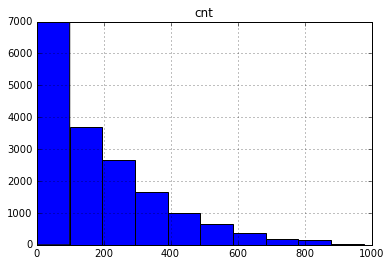

hr  time_label
0   0           4
1   1           4
2   2           4
3   3           4
4   4           4

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
# if using a Jupyter notebook, includue:
%matplotlib inline
#import bike rentails
bike_rentals = pd.read_csv("bike_rental_hour.csv")
print(bike_rentals.head(10))

#histograma
bike_rentals.hist(column='cnt')
plt.show()


#correlacao com o numero de alugueis
bike_rentals.corr()['cnt']

#cria função que assinala o turno da hora (1-manhã, 2- tarde, 3-noite, 4- madrugada)
def assign_label(num):
    if num >= 6 and num <= 12:
        return 1
    elif  num >=12 and num <= 18:
        return 2
    elif  num >=18 and num <= 24:
        return 3
    elif num >= 0 and num <= 6:
        return 4
bike_rentals["time_label"]=bike_rentals['hr'].apply(assign_label)
bike_rentals[['hr','time_label']].head()


<h1> Definição da Métrica de Erro </h1>
Como métrica de erro, defini MSE, visto qeu ele mede a amplitude do erro entre o previsto e o real, sem considerar se o valor é abaixo ou acima. </h2>

In [4]:
#Select 80% of the rows in bike_rentals to be part of the training set using the sample
#method on bike_rentals. Assign the result to train.
train = bike_rentals.sample(frac=0.8, random_state=1)
test = bike_rentals.loc[~bike_rentals.index.isin(train.index)]

In [18]:
#selecionando as colunas a fazerem parte do modelo

colunas = list(bike_rentals.columns)
colunas_a_retirar = ['cnt','casual','dteday','registered']
colunas =[x for x in colunas if x not in colunas_a_retirar]
colunas

['instant',
 'season',
 'yr',
 'mnth',
 'hr',
 'holiday',
 'weekday',
 'workingday',
 'weathersit',
 'temp',
 'atemp',
 'hum',
 'windspeed',
 'time_label']

In [26]:
#usando regressao linear

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error

ln = LinearRegression()
ln.fit(train[colunas],train['cnt'])
ln_prediction= ln.predict(test[colunas])
ln_mae =np.mean((ln_prediction - test["cnt"]) ** 2)
ln_mae

16402.497093142552

In [25]:
from sklearn.tree import DecisionTreeRegressor
reg = DecisionTreeRegressor(min_samples_leaf=5)
reg.fit(train[colunas],train['cnt'])
reg_prediction= reg.predict(test[colunas])
reg_mae = np.mean((test['cnt']-reg_prediction)**2)
reg_mae

2740.5734531699354

In [28]:
#Random Forest
from sklearn.ensemble import RandomForestRegressor
reg = RandomForestRegressor(min_samples_leaf=5)
reg.fit(train[colunas], train["cnt"])
reg_prediction= reg.predict(test[colunas])
reg_mae = np.mean((test['cnt']-reg_prediction)**2)
reg_mae

2105.235162867452